# Chapter 10 - Amazon Braket Hybrid Jobs, Pennylane and Containers


© 2021, 2022 Packt Publishing

Written by Alex Khan

https://docs.aws.amazon.com/braket/latest/developerguide/braket-jobs.html

pricing help


https://aws.amazon.com/braket/pricing/#:~:text=AWS%20Free%20Tier%20gives%20you,through%20the%20Hybrid%20Jobs%20feature.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import time
%matplotlib inline
from braket.aws import AwsQuantumJob,  AwsSession

In [2]:
matrix="ionq-matrix"
filename=matrix+".csv"

In [3]:
import time
start=0.1
end=0.7
step=0.1
shots=10

param=np.round(np.arange(start,end,step,dtype=float), 2).tolist()

In [10]:
job_name="QAOA-ionqmatrix-SV1"+str(int(time.time()))
print(job_name)

QAOA-ionqmatrix-SV11646020122


In [ ]:
#Define hyperparameters
#need to be strings
hyperparameters = {
    "start": str(start),
    "end":str(end),
    "step":str(step),
    "shots":str(shots),
    "matrix":matrix
}

In [ ]:
job = AwsQuantumJob.create(
    "arn:aws:braket:::device/quantum-simulator/amazon/sv1",
    source_module="QAOA.py", 
    entry_point="QAOA:start_here",
    job_name=job_name,
    hyperparameters=hyperparameters,
    input_data=filename,
    wait_until_complete=False
)

In [1]:
#job_arn=job.arn
#print(job_arn)

In [4]:
#job_arn=''
#job = AwsQuantumJob(arn=job_arn)

In [5]:
status=job.state()
print(status)
if status=='COMPLETED':
    #print(job.metadata())
    print(job.result())

COMPLETED
{'E': [0.53, -0.24000000000000002, -1.52, -0.8399999999999995, -0.5, -0.19000000000000009, -0.879999999999999, -0.8000000000000002, -1.0899999999999994, -2.0500000000000003, -1.52, -1.7500000000000002, -0.2999999999999996, -2.5000000000000004, -1.48, -1.48, -2.0500000000000003, -2.0399999999999996, -1.7500000000000002, -1.48, -2.0500000000000003, -0.4399999999999997, -2.0500000000000003, -2.5000000000000004, -0.3399999999999998, -0.8299999999999995, -1.2099999999999995, -2.5000000000000004, -2.0500000000000003, -1.48, 0.5499999999999998, -0.79, -1.52, -1.4799999999999995, -0.93, -0.9299999999999996], 'ideal_param1': 0.30000000000000004, 'ideal_param2': 0.2, 'lowest_energy': -2.5000000000000004, 'best_energy': -2.5000000000000004, 'best_solution': '11000001111'}


In [6]:
E = np.array(job.result()['E'])
D= E.reshape(len(param), len(param))

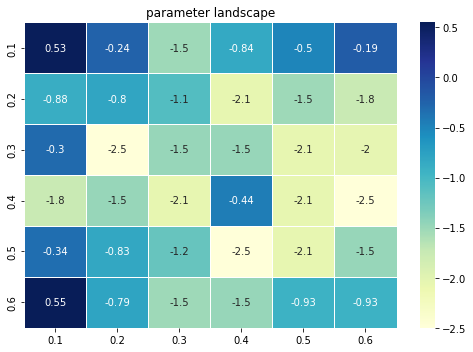

In [7]:
plt.figure(1, figsize=[7, 5])
sns.heatmap(D, annot=True,xticklabels=param, yticklabels=param,  linewidths=.5, cmap="YlGnBu", annot_kws = {'alpha': 1})
plt.title('parameter landscape');
plt.tight_layout();

In [8]:
ideal_param1=job.result()['ideal_param1']
ideal_param2=job.result()['ideal_param2']
lowest_energy=job.result()['lowest_energy']
best_energy=job.result()['best_energy']
best_solution=job.result()['best_solution']
print('ideal_param1:',ideal_param1,'ideal_param2:',ideal_param2,'lowest_energy:',lowest_energy)
print('best_energy:',best_energy,'best_solution:',best_solution)

ideal_param1: 0.30000000000000004 ideal_param2: 0.2 lowest_energy: -2.5000000000000004
best_energy: -2.5000000000000004 best_solution: 11000001111
